In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 40.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 30.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.0 MB/s eta 0:00:0000:0100:

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14526/14526 ━━━━━━━━━━━━━━━━━━━━ 6s 358us/step - accuracy: 0.7162 - auc: 0.9589 - loss: 0.6629 - precision: 0.7309 - recall: 0.6856 - val_accuracy: 0.7515 - val_auc: 0.9693 - val_loss: 0.5675 - val_precision: 0.7616 - val_recall: 0.7374
Epoch 2/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 351us/step - accuracy: 0.7600 - auc: 0.9712 - loss: 0.5487 - precision: 0.7709 - recall: 0.7441 - val_accuracy: 0.7745 - val_auc: 0.9736 - val_loss: 0.5249 - val_precision: 0.7835 - val_recall: 0.7620
Epoch 3/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 352us/step - accuracy: 0.7746 - auc: 0.9744 - loss: 0.5158 - precision: 0.7844 - recall: 0.7612 - val_accuracy: 0.7787 - val_auc: 0.9745 - val_loss: 0.5148 - val_precision: 0.7902 - val_recall: 0.7631
Epoch 4/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 349us/step - accuracy: 0.7846 - auc: 0.9762 - loss: 0.4958 - precision: 0.7938 - recall: 0.7713 - val_accuracy: 0.7875 - val_auc: 0.9771 - val_loss: 0.4872 - val_precision: 0.7962 - val_recall: 0.7739
Epoch 5/100
1452

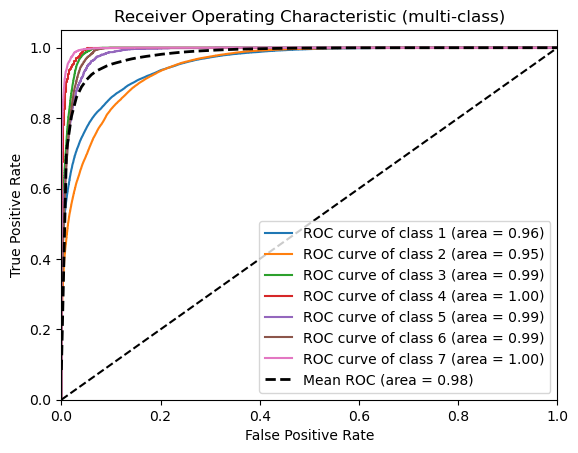

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score

# Load data
x_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_train.csv')
y_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_train.csv')
x_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_test.csv')
y_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_test.csv')

# Flatten and encode labels
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Adjust labels for categorical encoding
y_train -= y_train.min()
y_test -= y_test.min()
num_classes = len(np.unique(y_train))

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(), Recall()])

# Train model
history = model.fit(x_train_scaled, y_train_encoded, epochs=100, validation_data=(x_test_scaled, y_test_encoded))

# Evaluate model
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(x_test_scaled, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_acc}, Test AUC: {test_auc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Calculate F1 score
f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print(f"Test F1 Score: {f1}")

# Predict probabilities for ROC
y_test_probs = model.predict(x_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)

# Store interpolated TPRs
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_test_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i+1} (area = {roc_auc[i]:0.2f})')
    
    # Interpolate TPR for this class and add to mean_tpr
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Calculate average TPR and AUC
mean_tpr /= num_classes
mean_auc = auc(all_fpr, mean_tpr)

# Plot the average ROC curve
plt.plot(all_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:0.2f})', linewidth=2)

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (multi-class)')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 324us/step - accuracy: 0.7152 - auc: 0.9586 - loss: 0.6648 - precision: 0.7319 - recall: 0.6824 - val_accuracy: 0.7582 - val_auc: 0.9707 - val_loss: 0.5602 - val_precision: 0.7723 - val_recall: 0.7364
Epoch 2/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 321us/step - accuracy: 0.7653 - auc: 0.9719 - loss: 0.5444 - precision: 0.7777 - recall: 0.7481 - val_accuracy: 0.7655 - val_auc: 0.9721 - val_loss: 0.5404 - val_precision: 0.7765 - val_recall: 0.7485
Epoch 3/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 319us/step - accuracy: 0.7791 - auc: 0.9748 - loss: 0.5130 - precision: 0.7896 - recall: 0.7638 - val_accuracy: 0.7851 - val_auc: 0.9765 - val_loss: 0.4949 - val_precision: 0.7963 - val_recall: 0.7689
Epoch 4/100
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 5s 317us/step - accuracy: 0.7876 - auc: 0.9766 - loss: 0.4936 - precision: 0.7973 - recall: 0.7737 - val_accuracy: 0.7931 - val_auc: 0.9771 - val_loss: 0.4878 - val_precision: 0.8021 - val_recall: 0.7798
Epoch 5/100
1452

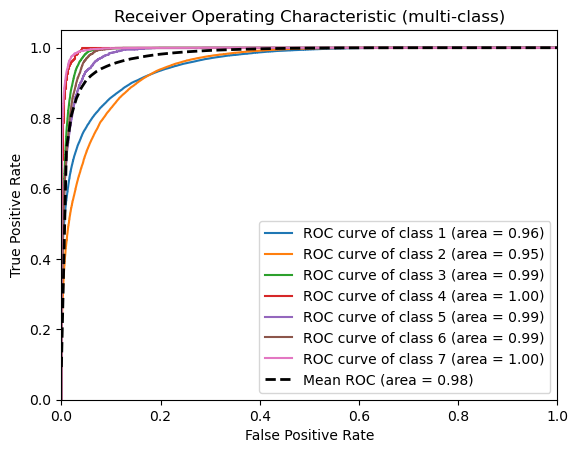

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score

# Load data
x_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_train.csv')
y_train = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_train.csv')
x_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/X_test.csv')
y_test = pd.read_csv('/Users/xingyuzhai/Desktop/CS 334 Final Project/CS344/y_test.csv')

# Flatten and encode labels
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Adjust labels for categorical encoding
y_train -= y_train.min()
y_test -= y_test.min()
num_classes = len(np.unique(y_train))

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(), Recall()])

# Train model
history = model.fit(x_train_scaled, y_train_encoded, epochs=100, validation_data=(x_test_scaled, y_test_encoded))

# Evaluate model
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(x_test_scaled, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_acc}, Test AUC: {test_auc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Calculate F1 score
f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print(f"Test F1 Score: {f1}")

# Predict probabilities for ROC
y_test_probs = model.predict(x_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)

# Store interpolated TPRs
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_test_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i+1} (area = {roc_auc[i]:0.2f})')
    
    # Interpolate TPR for this class and add to mean_tpr
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Calculate average TPR and AUC
mean_tpr /= num_classes
mean_auc = auc(all_fpr, mean_tpr)

# Plot the average ROC curve
plt.plot(all_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:0.2f})', linewidth=2)

# Plot settings
# plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (multi-class)')
plt.legend(loc="lower right")
plt.show()
